In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from scripts import data_process

plt.rcParams['font.sans-serif'] = ['KaiTi']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 当代年轻人婚恋观专题分析（一）——异地恋
本专题分析数据主要来源于青藤之恋匿名投票贴，包含4个投票共1527条评论。
数据采集方法、原始数据、数据处理方法均已开源，大家感兴趣的自行获取原始数据。
项目地址：https://github.com/Yellow-BringtEast/qingteng_data_analysis
如果本项目对您有所帮助，动动手指，请给项目一个star。

## 项目说明
本分析使用的数据，仅包含项目分析所需基本字段，不包含任何个人隐私信息。

## 分析背景
我是一名数据分析师，主要从事数据分析工作，对数据分析有着浓厚的兴趣。我是2023年8月左右在知乎上看到青藤之恋的广告，下载了app，后面为了攒币，天天做任务投票时，发现了大家对某些问题在认知上存在比较大的差异，于是便萌生了这个项目。本项目主要采用专题的形式，分析当代年情人赛博相亲时，对有关异地恋、彩礼、性别对立等话题的思考。基于大样本数据，全面剖析当代年轻人的恋爱观和婚姻观。发掘不同视角，扩展认知边界。本次分析专题选择的话题是异地恋。

## 一、投票数据分析

本次分析，筛选了4个具有代表性的投票贴，分别是：
1. 投票贴id-102529125：我被单位从大城市调到小城市任职，这里工作有很多不方便的地方，我也一直想要调回家工作。现在也到了结婚的年龄，如果我在小城市当地找对象成家的话将来想调回家基本不可能，如果我回家找对象很多人比较介意异地，很难找到，我该怎么选择呢？
- A:调回家后找对象, B:在小城市当地成家, C:我有其他想法，评论区见
2. 投票贴id-99995897：一个月见一次的异地恋可以接受吗？
- A:可以接受, B:不能接受, C:我有其他想法，评论区见
3. 投票贴id-98473952：最近认识了一个女生，我们聊得很好，已经一起玩过几次。然而，她突然因为工作需要去西藏支援一年，而她上一段感情是5年异地恋，最终男方出轨，因此她对异地恋并不太感兴趣。我已经表白过，她说要考虑，但我们还能愉快地聊天。七夕我送她一份礼物。不过，她收到礼物后一直想把钱转给我，我拒绝了。最近她开始变得冷淡。请问大家，我应该怎么做才能挽回局势呢？
- A:给她空间慢慢来，不给她压力, B:坦诚地告诉她我对她的感情, C:我有其他想法，评论区见
4. 投票贴id-66385330：最近聊了一个女生，感觉特别好，是个有趣的人，但是突然发现地区显示她跟我其实距离还挺远的，之前误以为大家一个城市，现在因为城市感受到非常犹豫，担心继续会因为距离问题无疾而终，我现在应该继续接触还是慢慢淡化呢？
- A:遇到喜欢的人不容易，当然要继续接触，遇到问题就解决问题, B:不着急决定，可以慢慢接触并询问了解她关于城市距离的想法, C:明确告诉她自己的想法和顾虑，看看她的态度然后商量俩人要不要继续接触, D:自己不能接受距离问题，一开始就不要考虑，及时止损, E:我有其他想法

In [2]:
# 投票数据
moments = pd.read_csv('../data/moment_info.csv')
moments_vote_result = data_process.get_vote_result(moments)
moments_vote_result = moments_vote_result.melt(id_vars=['moment_id', 'option_id', 'label', 'msg'],
                                               value_vars=['male_vote', 'female_vote'],
                                               value_name='vote_count', var_name='sex')
moments_vote_result['total'] = moments_vote_result.groupby(by=['moment_id', 'sex'])['vote_count'].transform('sum')
moments_vote_result['vote_percent'] = moments_vote_result['vote_count'] / moments_vote_result['total'] * 100

### 1.1 男女投票人数分析

在4次投票样本中，男性投票人数为422963人，女性投票人数为112620人。我认为大概有一下两个比较合理的猜测：
1. 在男女投票积极性一致的前提下，青藤用户群中男性比例较高，女性比例较低，男女比大致在4:1左右，该结论需要进一步数据验证；
2. 在男女比大致接近1的前提下，男性用户相较女性用户有更强的攒币动机，为了给心仪的对象发小纸条，更愿意花时间完成每日任务而参与投票。

要是大家有不同的看法，欢迎在评论区讨论。

### 1.2 各投票贴男女投票人数占比分析

4个投票贴的男女投票人数占比如下图一。从图中可以看出，在绝大部分投票结果中，男女投票的倾向性差异不大。只有在投票id为999995897的投票贴中，男女投票倾向出现了很大差异。56.57%的男性认为可以接受一个月见一次的异地恋，而45.52%的女性则不能接受。说明对于异地恋男性的接受程度是要高于女性的。当然得出这个结论的假设前提是投票行为是投票人出于自身真实意愿做出的选择，而不是为了完成任务进行的随意选择。一般而言，完成任务的人群倾向于直接选A，因此我们不能100%确定男性是否更容易接受异地点，但可以明确的是女性肯定不倾向于接受异地恋，因为选B的女性占比是最高的。


Text(0.5, 0.98, '图一 各投票贴男女投票人数占比')

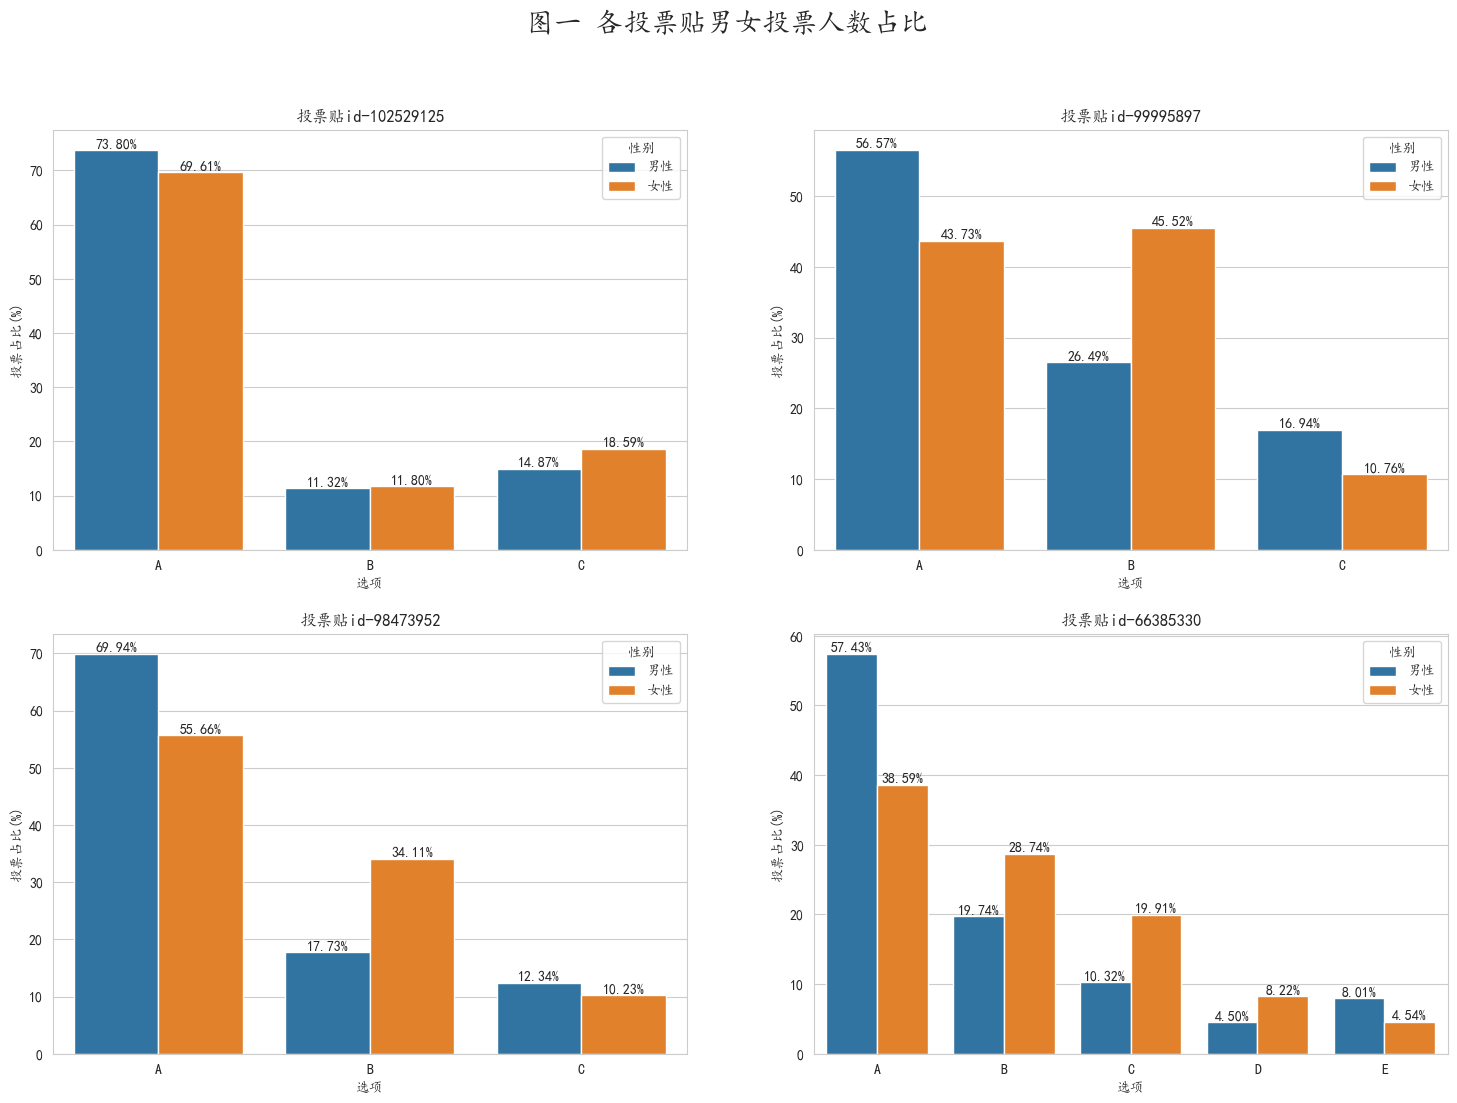

In [10]:
# 投票结果
fig, ax = plt.subplots(2, 2, figsize=(18, 12), )

for index, moment_id in enumerate(moments_vote_result['moment_id'].unique()):
    if index <= 1:
        sub_ax = ax[0, index]
    else:
        sub_ax = ax[1, index - 2]
        
    vote_bars = sns.barplot(x='label', y='vote_percent', hue='sex',
                            data=moments_vote_result.loc[moments_vote_result['moment_id'] == moment_id],
                            err_kws={'color': 'none'}, ax=sub_ax, legend=True)
    

    for i in vote_bars.containers:
        vote_bars.bar_label(i, fmt='%.2f%%')
        
    vote_bars.set(xlabel='选项', ylabel='投票占比(%)')
    vote_bars.set_title(f"投票贴id-{moment_id}")
    
    h, _ = vote_bars.get_legend_handles_labels()
    vote_bars.legend(h,['男性', '女性'], title='性别', loc='upper right')
    
plt.suptitle('图一 各投票贴选项男女投票人数占比', fontsize=20)